# ezlocalai Tests and Examples

Simply choose your favorite model of choice from the models list and paste it into the `model` variable on the API calls. You can get a list of models below.

Install OpenAI and requests:

```bash
pip install openai requests
```

**Note, you do not need an OpenAI API Key, the API Key is your `EZLOCALAI_API_KEY` for the server if you defined one in your `.env` file.**

## Global definitions and helpers


In [1]:
import openai
import requests
import time

# Set your EZLOCALAI_SERVER and EZLOCALAI_API_KEY here for using the notebook.
EZLOCALAI_SERVER = "http://localhost:8091"
EZLOCALAI_API_KEY = "Your EZLOCALAI_API_KEY from your .env file"
DEFAULT_LLM = "zephyr-7b-beta"
SYSTEM_MESSAGE = "Act as a creative writer and image creator. All of your responses are transcribed to audio and sent to the user. Be concise with all responses. After the request is fulfilled, end with </s>."
DEFAULT_MAX_TOKENS = 256
DEFAULT_TEMPERATURE = 1.33
DEFAULT_TOP_P = 0.95


# ------------------- DO NOT EDIT BELOW THIS LINE IN THIS CELL ------------------- #
openai.base_url = f"{EZLOCALAI_SERVER}/v1/"
openai.api_key = EZLOCALAI_API_KEY if EZLOCALAI_API_KEY else EZLOCALAI_SERVER
HEADERS = {
    "Content-Type": "application/json",
    "Authorization": f"{EZLOCALAI_API_KEY}",
    "ngrok-skip-browser-warning": "true",
}


def display_content(content):
    global EZLOCALAI_SERVER
    global HEADERS
    outputs_url = f"{EZLOCALAI_SERVER}/outputs/"
    try:
        from IPython.display import Audio, display, Image, Video
    except:
        print(content)
        return
    if "http://localhost:8091/outputs/" in content:
        if outputs_url != "http://localhost:8091/outputs/":
            content = content.replace("http://localhost:8091/outputs/", outputs_url)
    if "<audio controls>" in content or " " not in content:
        import base64
        from datetime import datetime

        try:
            audio_response = content.split("data:audio/wav;base64,")[1].split('" type')[
                0
            ]
        except:
            audio_response = content
        file_name = f"{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.wav"
        with open(file_name, "wb") as fh:
            fh.write(base64.b64decode(audio_response))
        display(Audio(filename=file_name, autoplay=True))
    if outputs_url in content:
        file_name = content.split(outputs_url)[1].split('"')[0]
        url = f"{outputs_url}{file_name}"
        data = requests.get(url, headers=HEADERS).content
        if url.endswith(".jpg") or url.endswith(".png"):
            content = content.replace(url, "")
            display(Image(data=data))
        elif url.endswith(".mp4"):
            content = content.replace(url, "")
            display(Video(data=data, autoplay=True))
        elif url.endswith(".wav"):
            content = content.replace(url, "")
            print(f"URL: {url}")
            display(Audio(data=data, autoplay=True))
    print(content)

## Language Models

Get a list of models to choose from if you don't already know what model you want to use.


In [2]:
# Wait for server to come up instead of timing out.
while True:
    try:
        models = requests.get(f"{EZLOCALAI_SERVER}/v1/models", headers=HEADERS)
        if models.status_code == 200:
            break
    except:
        pass
    time.sleep(1)

print(models.json())

['bakllava-1-7b', 'llava-v1.5-7b', 'llava-v1.5-13b', 'yi-vl-6b', 'CapybaraHermes-2.5-Mistral-7B', 'CapybaraHermes-2.5-Mistral-7B', 'KafkaLM-70B-German-V0.1', 'CodeLlama-70B-Python', 'CodeLlama-70B-Instruct', 'CodeLlama-70B-hf', 'Tess-34B-v1.5b', 'Tess-10.7B-v1.5b', 'Goliath-longLORA-120b-rope8-32k-fp16', 'Etheria-55b-v0.1', 'EstopianMaid-13B', 'Everyone-Coder-33B-Base', 'FusionNet_34Bx2_MoE', 'WestLake-7B-v2', 'WestSeverus-7B-DPO', 'DiscoLM_German_7b_v1', 'Garrulus', 'DareVox-7B', 'NexoNimbus-7B', 'Lelantos-Maid-DPO-7B', 'stable-code-3b', 'Dr_Samantha-7B', 'NeuralBeagle14-7B', 'tigerbot-13B-chat-v5', 'Nous-Hermes-2-Mixtral-8x7B-SFT', 'Thespis-13B-DPO-v0.7', 'Code-290k-13B', 'Nous-Hermes-2-Mixtral-8x7B-DPO', 'Venus-120b-v1.2', 'LLaMA2-13B-Estopia', 'medicine-LLM', 'finance-LLM-13B', 'Yi-34B-200K-DARE-megamerge-v8', 'phi-2-orange', 'laser-dolphin-mixtral-2x7b-dpo', 'bagel-dpo-8x7b-v0.2', 'Everyone-Coder-4x7b-Base', 'phi-2-electrical-engineering', 'Cosmosis-3x34B', 'HamSter-0.1', 'Helion-

## Voices

Any `wav` file in the `voices` directory will be available to use as a voice.


In [3]:
voices = requests.get(f"{EZLOCALAI_SERVER}/v1/audio/voices", headers=HEADERS)
print(voices.json())

{'voices': ['default', 'DukeNukem', 'Hal9000_Mono', 'Hal_voice_9000_Synthetic', 'SyntheticStarTrekComputerVoice', 'Synthetic_DukeNukem', 'Synthetic_Female_Hybrid_4_Phonetics_0001', 'Synthetic_Female_Phonetics_0001']}


## Embeddings

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/embeddings)


In [4]:
# Modify this prompt to generate different outputs
prompt = "Tacos are great."

response = openai.embeddings.create(
    input=prompt,
    model=DEFAULT_LLM,
)
print(response.data[0].embedding)

[0.0013985911930867098, -0.021557552620458664, -0.013637351639953834, 0.014807919642263195, -4.5254669052567516e-05, -0.008244474003705227, 0.010858501312314153, -0.009313202217651481, -0.012605589080427531, -0.003387614323900656, 0.00012619199062486182, 0.0023089459710484363, 0.0011987114629516855, 0.019484915054896836, -0.02936115752032895, 0.0036439057202790285, 0.005367771427477639, -0.011205092398500916, 0.003762798643476219, -0.004292226074262232, -0.0035249252836954273, 0.0018537489299386947, -0.005097074099437981, 0.0036252288282963797, -0.007374937925681641, -0.008051541070830271, -0.00010892558989023027, -0.001226127180696488, -0.019375294251756003, 0.001648813766415874, 0.020391875541723874, -0.0024437486743628667, 0.004520098342831087, 0.004219945544248097, -0.0014504823323251662, -0.011540198043616409, -0.005213900785522334, 0.00103229193874796, -0.00013701331832331412, -0.0018336101038062135, 0.008398083640823867, -0.024335580015201568, 0.02313951460393076, 0.000130917195

## Chat Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/chat)


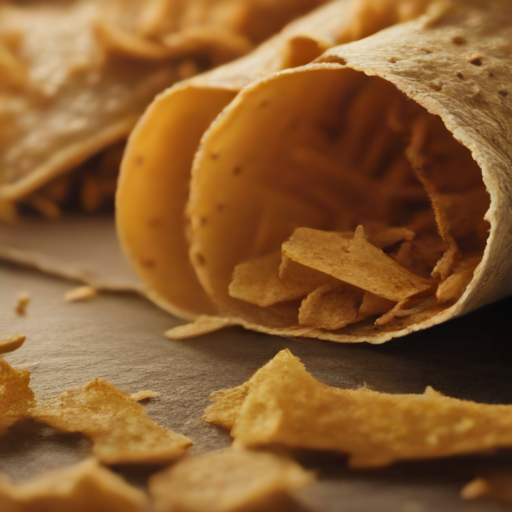

Crisp shell, spicy burst,
   Taco Bell's DLT delights,
   Crunchy bliss unfolds.

   [Image description: Close-up shot of a Doritos Locos Tacos with spicy Doritos shell, golden ratio, detailed, hyper detailed, HDR, UHD, professional, nostalgic lighting, natural light, sun light, sunrays, sepia, vivid colors, bright colors, color splash, 4K resolution, low poly, isometric assets, Unreal Engine, Unity Engine, quantum.]

   Our image captures the essence of Taco Bell's DLTs, showcasing the crunchy shell and spicy Doritos filling in stunning detail. The golden ratio and hyper-realistic lighting create an immersive experience, while the vivid colors and color splash add a pop of nostalgia. The low poly and isometric assets give it a modern touch, while the Unreal Engine and Unity Engine ensure high-quality visuals. This image truly captures the DLT experience in all its glory!




In [5]:
# Modify this prompt to generate different outputs
prompt = "Write a haiku about Taco Bell's Doritos Locos Tacos."


response = openai.chat.completions.create(
    model=DEFAULT_LLM,
    messages=[{"role": "user", "content": prompt}],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(response.messages[1]["content"])

## Completion

[OpenAI API Reference](https://platform.openai.com/docs/api-reference/completions/create)


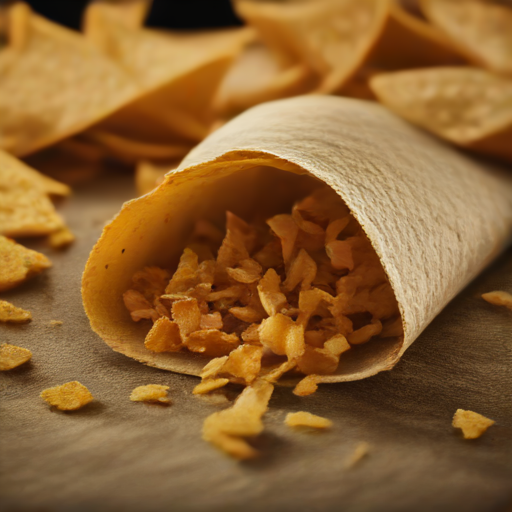

Crisp shell, spicy burst,
   Taco Bell's DLT delights,
   Crunchy bliss unfolds.

   [Image description: Close-up shot of a Doritos Locos Tacos with spicy Doritos shell, golden ratio, detailed, hyper detailed, HDR, UHD, professional, nostalgic lighting, natural light, sun light, sunrays, sepia, vivid colors, bright colors, color splash, 4K resolution, low poly, isometric assets, Unreal Engine, Unity Engine, quantum.]

   Our image captures the essence of Taco Bell's DLTs, showcasing the crunchy shell and spicy Doritos filling in stunning detail. The golden ratio and hyper-realistic lighting create an immersive experience, while the vivid colors and color splash add a pop of nostalgia. The low poly and isometric assets give it a modern touch, while the Unreal Engine and Unity Engine ensure high-quality visuals. This image truly captures the DLT experience in all its glory!




In [6]:
# Modify this prompt to generate different outputs
prompt = "Write a haiku about Taco Bell's Doritos Locos Tacos."

completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=prompt,
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={"system_message": SYSTEM_MESSAGE},
)
display_content(completion.choices[0].text)

## Cloning Text to Speech

Any `wav` file in the `voices` directory can be used as a voice.


In [7]:
prompt = "Write a short poem about Taco Bell's Doritos Locos Tacos."
response = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/generation",
    headers=HEADERS,
    json={
        "text": prompt,
        "voice": "DukeNukem",
        "language": "en",
    },
)
audio_response = response.json()
display_content(audio_response["data"])

UklGRkb0AgBXQVZFZm10IBAAAAABAAEAwF0AAIC7AAACABAATElTVBoAAABJTkZPSVNGVA4AAABMYXZmNTguNzYuMTAwAGRhdGEA9AIA+f/v//z/CwASAB0AKAAyADQAOABHAEsATQBFAEYAQQA8AEQAQQBBADsAQgBBAD4ANgA5ADUALwAtACkAHgAcABgAEAAKAA8ADQABAPr/7f/o/9//2f/Z/83/zv/O/8f/yf/G/8z/xv/C/73/v/+//7//vv/A/8X/w//M/8r/xP/C/8v/zf/Q/9j/3//l/+D/6//o/+j/8f/z/+b/6f/7//n/+P/w//n/+P8IAAoACwALAAgADwAVABYAFgATABIAFgAYACEAIAAZACEAIQAgABwAIwApACcALwAuACUAMAAuACYAJAAmACQAIgAXABgAFAAfACYAHQAVAA8AEgAMAAoAEwAPABYAFwAQABIAGgAhABYAFAAWAAwADgAZABkAGAASAAoACAANABQAEwAHAP7//v/8//n//v8BAPH/9//6//H/7//4//H/9P/3//T/8v/0/+7/5//o//f/9//x//L/9v/+//n/+f8EAAEABAAPAAoACAAHAP//CgAFAPv/AgD2//v/AQD9//n/9P/4//X/9//z//H/7f/u/+v/9P/w/+3/6v/j/+D/1//P/9T/2//U/9L/x//X/87/1P/b/9v/4f/Z/9r/6f/u/+n/6P/o/+P/4f/v/wAA+//+/wYACQAbACAAKgAnACsALAAtAC0AMwA6ADwAPQBDAEcASABPAEkASwBJAEsATgBMAE4AUgBQAFcAXgBqAGcAYwBpAFoAUQBcAGEAZwB9AH8AeAB2AIMAhwCGAHoAegB3AHwAeQByAHwAeAB0AHoAawBvAF0AZABjAHUAbQBsAGQAXgBoAGAAUgBFAEYARAA8ADQANgAiACMAGAASABgAGgAZABQADAAYACsALgA1AEYASwBRAFUAYwBnAG4AgACJAIoA

## Text to Speech


In [8]:
# We will use the audio response from the previous cell to transcribe it.
transcription = requests.post(
    f"{EZLOCALAI_SERVER}/v1/audio/transcriptions",
    json={
        "file": audio_response["data"],
        "audio_format": "wav",
        "model": "base",
    },
    headers=HEADERS,
)


print(transcription.json())

{'data': " Write a short poem about Taco Bell's Doritos Locos Tacos."}


## Voice Completion Example


In [9]:
# We will use the audio response from a couple of cells back.
completion = openai.completions.create(
    model=DEFAULT_LLM,
    prompt=audio_response["data"],
    temperature=DEFAULT_TEMPERATURE,
    max_tokens=DEFAULT_MAX_TOKENS,
    top_p=DEFAULT_TOP_P,
    n=1,
    stream=False,
    extra_body={
        "system_message": SYSTEM_MESSAGE,
        "audio_format": "wav",
        "voice": "DukeNukem",
    },
)

response_text = completion.choices[0].text
display_content(response_text)

InternalServerError: Internal Server Error